# Import libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # Data processing
import matplotlib.pyplot as plt  # Plotting library
import seaborn as sns # Plotting library (better visualizations)
import os # File navigation (to access csv)

# Load Data
The dataset that we will use today is from Kaggle, you can access it [here.](https://www.kaggle.com/datasets/rhuebner/human-resources-data-set)
In this notebook I have downloaded the dataset for local use. Feel free to grep / fetch the dataset using Kaggle's API.

In [2]:
# Read the csv file
df = pd.read_csv(r'C:\Users\ayu\Documents\dataset_hrd\HRDataset_v14.csv')
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [3]:
df.dtypes

Employee_Name                  object
EmpID                           int64
MarriedID                       int64
MaritalStatusID                 int64
GenderID                        int64
EmpStatusID                     int64
DeptID                          int64
PerfScoreID                     int64
FromDiversityJobFairID          int64
Salary                          int64
Termd                           int64
PositionID                      int64
Position                       object
State                          object
Zip                             int64
DOB                            object
Sex                            object
MaritalDesc                    object
CitizenDesc                    object
HispanicLatino                 object
RaceDesc                       object
DateofHire                     object
DateofTermination              object
TermReason                     object
EmploymentStatus               object
Department                     object
ManagerName 

# Changes
From output above, we can convert three fields containing Date information such as **DateofHire**, **DateofTermination**, and **LastPerformanceReview_Date** into an actual Date-time format.

In [4]:
df['LastPerformanceReview_Date']=pd.to_datetime(df['LastPerformanceReview_Date'])
df['DateofTermination']=pd.to_datetime(df['DateofTermination'])
df['LastPerformanceReview_Date']=pd.to_datetime(df['LastPerformanceReview_Date'])

# Run checks again
After converting, feel free to check again the **df.dtypes** function we used before. Then, let's check how many null values there are, and where they are.

In [5]:
df.isnull().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

Depending on the context, you may or may not want to remove null values present in your dataset. The null values in column **DateofTermination** means there are X amount of people that have not resign yet, so we can leave this column as is. There are also null values in **ManagerID**, where some managers have not yet been assigned an ID yet. We can leave this column as is.

# Demonstration
Now we move on to plot the dataframe to our needs. For this dataset, I have some sample questions to be used to create visualizations.

## *What is the dominant channel for our recruitment process?*

<AxesSubplot:xlabel='count', ylabel='RecruitmentSource'>

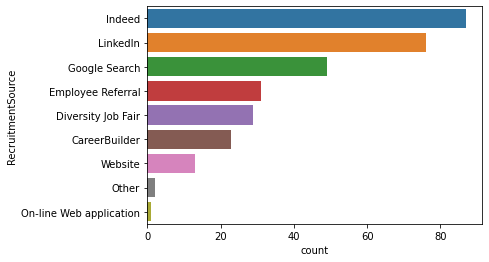

In [6]:
#Recruitment countplot
sns.countplot(y="RecruitmentSource", data=df, order = df['RecruitmentSource'].value_counts().index)

## *Which Department has the most employees?*

<AxesSubplot:xlabel='Department', ylabel='count'>

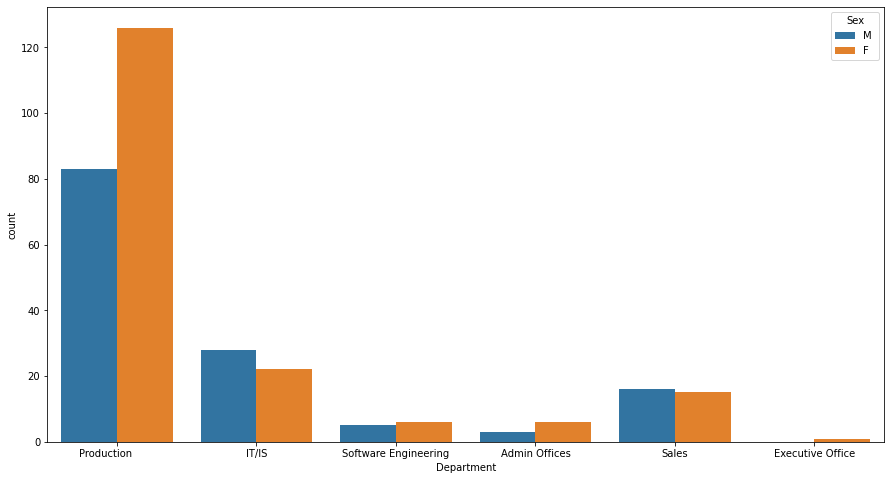

In [8]:
# Specify figure size
plt.figure(figsize=(15,8))
sns.countplot(x="Department", hue="Sex", data=df)

## *Which department has the highest salary?*

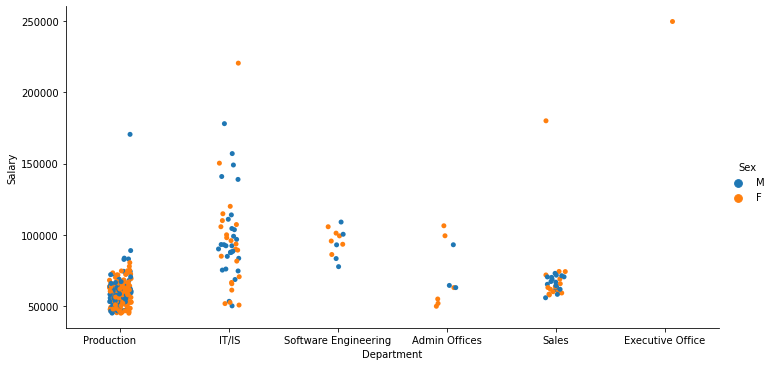

In [9]:
sns.catplot(x="Department", y="Salary", hue="Sex", data=df, aspect=2)

In [10]:
# Find Average Salary of each department
avg_dept_sal = df.groupby('Department',as_index=False).Salary.mean()
avg_dept_sal = avg_dept_sal.sort_values('Salary', ascending=False)
print(avg_dept_sal.rename(columns={'Salary':'Average Salary'}))

# Or use this code below..
# avg_dept_sal = df.groupby('Department').Salary.mean()
# print(avg_dept_sal)

             Department  Average Salary
1      Executive Office   250000.000000
2                 IT/IS    97064.640000
5  Software Engineering    94989.454545
0         Admin Offices    71791.888889
4                 Sales    69061.258065
3     Production           59953.545455


From findings above, we can conclude that:
- Though **Production Department** has the most amount of employees, the **Average Salary** is the lowest among other departments.
- The **Executive Office** has the highest **Average Salary**, but it only has one value.
- The **IT/IS Department** has the second-most amount of employees, and also the second-highest **Average Salary**.

## *What influences Salary the most?*
Here we will do a regression plot with **regplot** to determine its influence / correlation on one another. You can change what is being measured, but I suggest using a numeric data / column for plotting.

Salary & EngagementSurvey = 0.06496607104732474
Salary & Emp. Satisfaction = 0.06271834995957457
Salary & Absences = 0.0823821563079631
Salary & SpecialProjectsCount = 0.5083329012445209


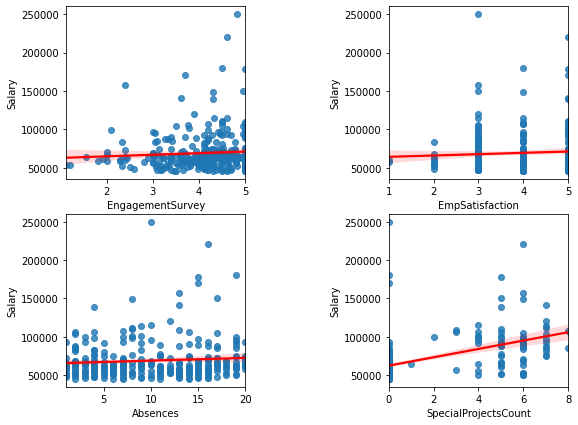

In [19]:
# Define how the grid will look like (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2)

# 2 lines below is to adjust the size of the subplots. Can be changed to however you like.
plt.rcParams["figure.figsize"] = [9,7]
plt.subplots_adjust(wspace = 0.8)

# Define the graphs to be fitted to the grid.
sns.regplot(y="Salary", x="EngagementSurvey", data=df, line_kws={"color": "red"}, ax=axes[0,0])
sns.regplot(y="Salary", x="EmpSatisfaction", data=df, line_kws={"color": "red"}, ax=axes[0,1])
sns.regplot(y="Salary", x="Absences", data=df, line_kws={"color": "red"}, ax=axes[1,0])
sns.regplot(y="Salary", x="SpecialProjectsCount", data=df, line_kws={"color": "red"}, ax=axes[1,1])

# Print Correlation Score.
print("Salary & EngagementSurvey = "+ str(df['Salary'].corr(df['EngagementSurvey'])))
print("Salary & Emp. Satisfaction = "+str(df['Salary'].corr(df['EmpSatisfaction'])))
print("Salary & Absences = "+ str(df['Salary'].corr(df['Absences'])))
print("Salary & SpecialProjectsCount = "+ str(df['Salary'].corr(df['SpecialProjectsCount'])))

Based on Androidkt.com,
- A positive correlation (Above 0 value) coefficient means that there is a perfect positive relationship between the two variables.
- A correlation coefficient of (-) represents a perfect negative correlation. This means when one increases, the other decreases and vice-versa.
- A value of 0, means that there is no correlation between the two and they are not related to each other at all.

You can read more [here.](https://androidkt.com/plot-correlation-matrix-and-heatmaps-between-columns-using-pandas-and-seaborn/)

Based on our 4 Parameters that may influence **Salary**, we can see that the **Count of Special Projects** has the highest probability of influencing **Salary**, with the number of **0.5083329012445209**.

## *How much does Performance Score affects Salary?*

<AxesSubplot:xlabel='PerformanceScore', ylabel='Salary'>

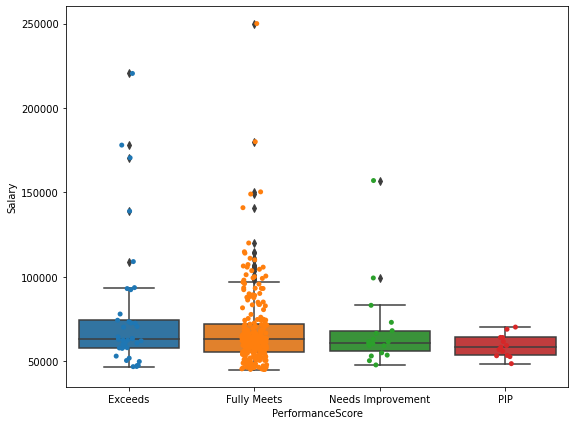

In [22]:
# Show Box Plot
sns.boxplot(x="PerformanceScore", y="Salary",data=df)
# Show points of observation, optional.
sns.stripplot(x="PerformanceScore", y="Salary", data=df)

From the graph above, we can see that there are a lot of points that we can consider an outlier. Be careful when progressing with these points as they can skew your regression models, and may create bias. Going through outliers requires business context (why it could happen), and an educated guess to either remove or replace with a mean value.

Salary & Performance Score = 0.13090258231751917


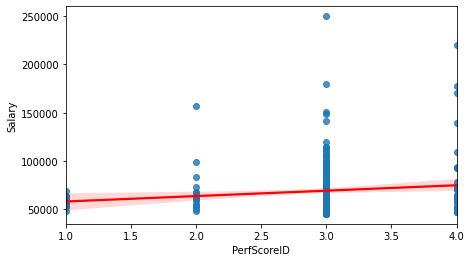

In [27]:
plt.figure(figsize=(7,4))
sns.regplot(y="Salary", x="PerfScoreID", data=df, line_kws={"color": "red"})
print("Salary & Performance Score = "+ str(df['Salary'].corr(df['PerfScoreID'])))

Though **Performance Score** does not influence **Salary** as significant as **Count of Special Projects**, it still proves to have some positive significance with the value of **0.13090258231751917**. Meaning, Performance Score **"Exceeds" (4)** have a slight significance to influence **Salary.**

## Termination

In [35]:
sns.histplot(
    data=df[df.TermReason != 'N/A-StillEmployed'],
    x=df[df.TermReason != 'N/A-StillEmployed'],
    edgecolor=".3",
    linewidth=.5,
)
#ax.set_xticks([500, 1000, 2000, 5000, 10000])

ValueError: If using all scalar values, you must pass an index

<AxesSubplot:xlabel='DateofTermination', ylabel='TermReason'>

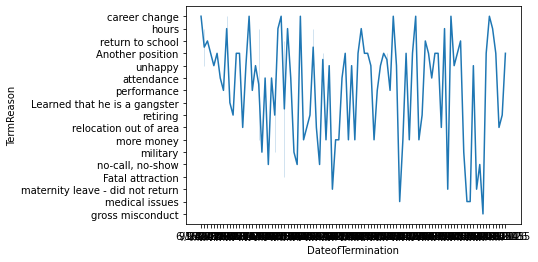

In [52]:
sns.lineplot(x='DateofTermination', y=data=df)

# References
Grouping and Aggregation by Jerry Cruise [here](https://towardsdatascience.com/data-grouping-in-python-d64f1203f8d3)<br>
Subplots by Statology [here](https://www.statology.org/seaborn-subplots/)